In [97]:
%%capture
!pip3 install matplotlib
!pip3 install seaborn

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import json
from tqdm import tqdm

In [159]:
meta_file = input('Path to the file "meta_overall.tsv": ')

In [100]:
# prepare data for plotting
overall_counts = {'total_count': [],
                 'hate_speech_count': [],
                 'religious_hate_count': [],
                 'religions_specific': []}

with open(meta_file, 'r', encoding='utf-8') as meta:
    for line in meta:
        split = line.split('\t')
        if len(split) > 1:
            filename = split[0]
            total_count = int(split[1])
            hate_speech_count = int(split[2])
            religious_hate_count = int(split[3])
            religions_specific = eval(split[4])
        
            overall_counts['total_count'].append(total_count)
            overall_counts['hate_speech_count'].append(hate_speech_count)
            overall_counts['religious_hate_count'].append(religious_hate_count)
            overall_counts['religions_specific'].extend(religions_specific)

In [110]:
# percentages of hate speech
print(f'Hate speech percentage overall: {round(100*sum(overall_counts["hate_speech_count"])/sum(overall_counts["total_count"]))}% ({sum(overall_counts["hate_speech_count"])} out of {sum(overall_counts["total_count"])} posts)')
print(f'Religious hate speech percentage overall: {round(100*sum(overall_counts["religious_hate_count"])/sum(overall_counts["total_count"]))}% ({sum(overall_counts["religious_hate_count"])} out of {sum(overall_counts["total_count"])} posts)')
print(f'Religious hate speech percentage within hate speech: {round(100*sum(overall_counts["religious_hate_count"])/sum(overall_counts["hate_speech_count"]))}% ({sum(overall_counts["religious_hate_count"])} out of {sum(overall_counts["hate_speech_count"])} posts)')

Hate speech percentage overall: 17% (527168 out of 3077452 posts)
Religious hate speech percentage overall: 2% (69667 out of 3077452 posts)
Religious hate speech percentage within hate speech: 13% (69667 out of 527168 posts)


In [101]:
counted = Counter(overall_counts['religions_specific']).most_common(10)
religions = [i[0] for i in counted]
counts = [i[1] for i in counted]

In [167]:
# percentages of specific religions
for r, c in counted:
    print(f'{r}: {round(100*c/sum(counts), 2)}%')

Islam: 34.71%
Christanity: 21.93%
Judaism: 20.94%
Other: 15.83%
Atheism: 5.44%
Mormonism: 0.62%
Hinduism: 0.36%
Buddhism: 0.16%


<Figure size 1080x864 with 0 Axes>

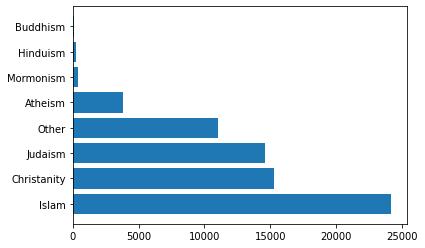

<Figure size 1080x864 with 0 Axes>

In [102]:
# bar plot of religions
plt.barh(religions, counts)
plt.figure(figsize=(15,12))

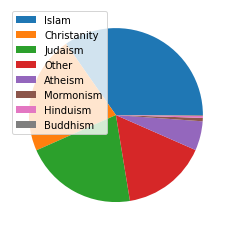

<Figure size 1000x600 with 0 Axes>

In [103]:
# pie plot of religions
plt.pie(counts)
plt.legend(religions, loc='best')
plt.figure(figsize=(10, 6), dpi=100)
plt.show()

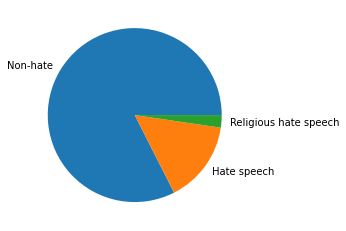

In [104]:
# pie plot of hate speech
plt.pie([sum(overall_counts['total_count'])-sum(overall_counts['hate_speech_count'])-sum(overall_counts['religious_hate_count']), sum(overall_counts['hate_speech_count'])-sum(overall_counts['religious_hate_count']), sum(overall_counts['religious_hate_count'])], labels=['Non-hate', 'Hate speech', 'Religious hate speech'])
plt.show()

In [ ]:
# preparing data of extracted countries

dir = input('Path to file-directory named "extracted": ')

countries = list()

for file in tqdm(os.listdir(dir)[:-1]):
    with open(dir+file, 'r', encoding='utf-8') as f:
        data = json.load(f)
        countries.extend(data['countries'])

In [156]:
countries_counted = Counter(countries).most_common()

country_names = [i[0] for i in countries_counted[:9]]
country_counts = [i[1] for i in countries_counted[:9]]
rest = sum([i[1] for i in countries_counted[9:]])

In [157]:
country_names.append('Other')
country_counts.extend([rest])

In [151]:
# top 9 origin countries of the posts
countries_counted[:9]

[('US', 1667907),
 ('UNK', 470639),
 ('CA', 210675),
 ('GB', 200000),
 ('AU', 121977),
 ('DE', 83258),
 ('BR', 37096),
 ('SE', 36128),
 ('PL', 33827)]

In [160]:
# percentages of countries of origin
for i, j in countries_counted[:10]:
    print(f'{i}: {round(100*(j)/(sum(country_counts)), 3)}% ({j} posts)')

US: 49.086% (1667907 posts)
UNK: 13.851% (470639 posts)
CA: 6.2% (210675 posts)
GB: 5.886% (200000 posts)
AU: 3.59% (121977 posts)
DE: 2.45% (83258 posts)
BR: 1.092% (37096 posts)
SE: 1.063% (36128 posts)
PL: 0.996% (33827 posts)
NL: 0.958% (32542 posts)


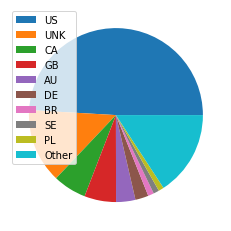

<Figure size 1000x600 with 0 Axes>

In [158]:
# pie plot of countries of origin
plt.pie(country_counts)#, labels=religions)
plt.legend(country_names, loc='best')
plt.figure(figsize=(10, 6), dpi=100)
plt.show()